In [64]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
pourcentage = 15
iAgent = 1
iMaxAgent = 10

In [2]:
def getTabFile(f):
    fp = open(f,'r')
    line = fp.readline()
    d = dict()
    i = 0
    while line:
        if not('R' in line):
            comb,val = line.split(" ") 
            d[comb]=val
        line = fp.readline()
    fp.close()
    return d


def findValueInFile(f,val):
    fp = open(f,'r')
    line = fp.readline()
    while line:
        if(val in line):
            comb,val = line.split(" ")
            fp.close()
            return val
        line = fp.readline()

    fp.close()
    return -1




In [3]:

def calcShapley(iAgent,iMaxAgent,pourcentage = 100):
    dic = dict()
    for i in range(1,10):
        fName = "ResultatEval"+str(i)+".txt"
        dic[i] = getTabFile(fName)
        
    calcMargFile = open("CalculContribMarginaleRSV"+str(pourcentage)+"_Totaltxt","w")
    agent = ['R','B','C','H']
    comb=[]
    k=dic.keys()

    for r in range(3):
        for c in range(3):
            for b in range(3):
                for h in range(3):
                    if(h+r+c+b==0):
                        comb.append( [1,b,c,h])
                    else:
                        comb.append( [r,b,c,h])
    val = []
    for ag in range(len(agent)):
        somme = 0
        for co in comb:
            toFind6 = str(co[0])+"/"+str(co[1])+"/"+str(co[2])+"/"+str(co[3])
            n = co[0]+co[1]+co[2]+co[3]
            cn = int(dic[n][toFind6])
            toFind7 = str(co[0]+int(ag==0))+"/"+str(co[1]+int(ag==1))+"/"+str(co[2]+int(ag==2))+"/"+str(co[3]+int(ag==3))
            n2=co[0]+int(ag==0)+co[1]+int(ag==1)+co[2]+int(ag==2)+co[3]+int(ag==3)
            cn1 = int(dic[n2][toFind7])
            somme+=(cn1-cn)
        somme = somme/(math.factorial(len(agent))*(pourcentage/100))
        print("contribMarg de "+str(agent[ag])+" : " +str(somme)+"\n")
        calcMargFile.write(str(agent[ag])+" " +str(somme)+"\n")
        val.append(somme)
    calcMargFile.close()

    plt.bar([1,2,3,4],val)
    plt.xticks([1,2,3,4],agent)
    plt.show()


In [12]:

def calcShapleyRSV(iAgent,iMaxAgent,verbose = True):
    pourcentages = [15,30,50,70,90,100]
    val = dict()
    for pourcentage in pourcentages :
        dic = dict()
        for i in range(1,10):
            fName = "ResultatEval"+str(i)+".txt"
            dic[i] = getTabFile(fName)

        calcMargFile = open("CalculContribMarginaleRSV"+str(pourcentage)+"_Totaltxt","w")
        agent = ['R','B','C','H']
        comb=[]
        k=dic.keys()

        for r in range(3):
            for c in range(3):
                for b in range(3):
                    for h in range(3):
                        if(h+r+c+b==0):
                            comb.append( [1,b,c,h])
                        else:
                            comb.append( [r,b,c,h])
        
        
        comb = random.sample(comb,int(len(comb)*(pourcentage/100)))
        val[pourcentage] = []
        for ag in range(len(agent)):
            somme = 0
            for co in comb:
                toFind6 = str(co[0])+"/"+str(co[1])+"/"+str(co[2])+"/"+str(co[3])
                n = co[0]+co[1]+co[2]+co[3]
                cn = int(dic[n][toFind6])
                toFind7 = str(co[0]+int(ag==0))+"/"+str(co[1]+int(ag==1))+"/"+str(co[2]+int(ag==2))+"/"+str(co[3]+int(ag==3))
                n2=co[0]+int(ag==0)+co[1]+int(ag==1)+co[2]+int(ag==2)+co[3]+int(ag==3)
                cn1 = int(dic[n2][toFind7])
                somme+=(cn1-cn)
            somme = somme/(math.factorial(len(agent))*(pourcentage/100))
            
            if(verbose):
                print("contribMarg de "+str(agent[ag])+" : " +str(somme)+" Pourcentage : "+str(pourcentage)+"\n")
            calcMargFile.write(str(agent[ag])+" " +str(somme)+"\n")
            val[pourcentage].append(somme)
        calcMargFile.close()
        if(verbose):
            plt.title("Contrib Marg pourcentage :"+str(pourcentage))
            plt.bar([1,2,3,4],val[pourcentage])
            plt.xticks([1,2,3,4],agent)
            plt.show()
    return val

In [102]:
def calculMoyenneErrorRate(nbIt):
    val = dict()
    moyenne=dict()
    for i in range(0,nbIt):
        val[i] = calcShapleyRSV(iAgent,iMaxAgent,False)
        for k in val[i].keys():
            if(not k in moyenne.keys()):
                moyenne[k] = dict()
                r,b,c,h=val[i][k]
                moyenne[k]['r']=r
                moyenne[k]['c']=c
                moyenne[k]['b']=b
                moyenne[k]['h']=h
            else:
                r,b,c,h=val[i][k]
                moyenne[k]['r']+=r
                moyenne[k]['c']+=c
                moyenne[k]['b']+=b
                moyenne[k]['h']+=h
    error = dict()
    cpt = 0
    X = np.arange(5)
    for k in moyenne.keys():
        cpt +=1
        for ag in ['r','b','c','h']:
            moyenne[k][ag]=moyenne[k][ag]/nbIt
        error[k] = dict()
        error[k]['r']= max(0,abs(val[0][100][0]-moyenne[k]['r'])/(val[0][100][0]))
        error[k]['b']= max(0,abs(val[0][100][1]-moyenne[k]['b'])/(val[0][100][1]))
        error[k]['c']= max(0,abs(val[0][100][2]-moyenne[k]['c'])/(val[0][100][2]))
        error[k]['h']= max(0,abs(val[0][100][3]-moyenne[k]['h'])/(val[0][100][3]))
        error[k]['m']= (error[k]['r']+error[k]['b']+error[k]['c']+error[k]['h'])/4
        print(error[k]['r'])
        print(error[k]['m'])
        values = [error[k]['r'],error[k]['b'],error[k]['c'],error[k]['h'],error[k]['m']]
        plt.bar(cpt,error[k]['m'],width = 1)
        #plt.bar(X+5*cpt, values,color=['red', 'green', 'blue', 'yellow','black'],width = 1)
        #plt.bar(X+4*cpt, x,color=['red', 'green', 'blue', 'yellow'], width = 1)
    plt.xlabel('Pourcentage de coalition étudié')
    plt.ylabel('Taux d\'erreur' )
    plt.xticks([r+1 for r in range(len([0,15,30,50,70,90]))],[15,30,50,70,90])
    
    plt.show()
    print(error)
    return error



0
0.15201838194030054
0
0.08350959107104798
0
0.035585652210132074
0
0.025304771593758733
0
0.020845420669523017
0
0.0


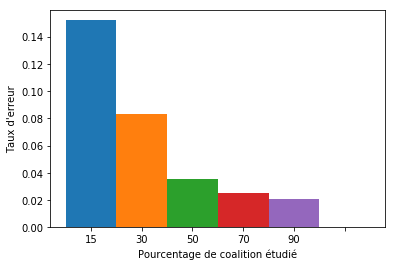

{15: {'r': 0, 'b': 0.10429447852760758, 'c': 0.1282051282051282, 'h': 0.3755739210284664, 'm': 0.15201838194030054}, 30: {'r': 0, 'b': 0.07770961145194272, 'c': 0.055226824457593617, 'h': 0.2011019283746556, 'm': 0.08350959107104798}, 50: {'r': 0, 'b': 0.06257668711656439, 'c': 0.014201183431952863, 'h': 0.06556473829201105, 'm': 0.035585652210132074}, 70: {'r': 0, 'b': 0.022787028921998295, 'c': 0.0016906170752324537, 'h': 0.07674144037780418, 'm': 0.025304771593758733}, 90: {'r': 0, 'b': 0.022494887525562487, 'c': 0.02629848783694949, 'h': 0.03458830731558009, 'm': 0.020845420669523017}, 100: {'r': 0, 'b': 0, 'c': 0, 'h': 0, 'm': 0.0}}


{15: {'b': 0.10429447852760758,
  'c': 0.1282051282051282,
  'h': 0.3755739210284664,
  'm': 0.15201838194030054,
  'r': 0},
 30: {'b': 0.07770961145194272,
  'c': 0.055226824457593617,
  'h': 0.2011019283746556,
  'm': 0.08350959107104798,
  'r': 0},
 50: {'b': 0.06257668711656439,
  'c': 0.014201183431952863,
  'h': 0.06556473829201105,
  'm': 0.035585652210132074,
  'r': 0},
 70: {'b': 0.022787028921998295,
  'c': 0.0016906170752324537,
  'h': 0.07674144037780418,
  'm': 0.025304771593758733,
  'r': 0},
 90: {'b': 0.022494887525562487,
  'c': 0.02629848783694949,
  'h': 0.03458830731558009,
  'm': 0.020845420669523017,
  'r': 0},
 100: {'b': 0, 'c': 0, 'h': 0, 'm': 0.0, 'r': 0}}

In [110]:
calculMoyenneErrorRate(5)

In [13]:
calcShapleyRSV(iAgent,iMaxAgent,False)

{15: [-7.500000000000001,
  5.277777777777779,
  13.611111111111112,
  12.500000000000002],
 30: [-0.6944444444444445,
  11.805555555555557,
  15.555555555555557,
  15.277777777777779],
 50: [0.4166666666666667, 13.75, 15.333333333333334, 23.833333333333332],
 70: [-3.333333333333334,
  15.535714285714288,
  15.17857142857143,
  11.011904761904765],
 90: [-2.268518518518518,
  14.259259259259258,
  14.722222222222221,
  16.11111111111111],
 100: [-2.25, 13.583333333333334, 14.083333333333334, 15.125]}

contribMarg de R : -15.000000000000002

contribMarg de B : 90.55555555555557

contribMarg de C : 93.8888888888889

contribMarg de H : 100.83333333333334



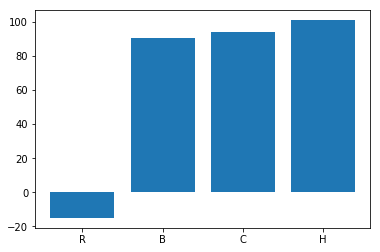

In [18]:
calcShapley(iAgent,iMaxAgent,pourcentage)